In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as c
from astropy.table import Table
import spectral_cube
from astropy.io import fits
import pylab as plt
plt.style.use('dark_background')

In [2]:
%run ../coelho_model_paa/compile_coelho_models.py

[0.0, -3.104838432727706e-08, -4.1324792083987454e-08, -1.4594032729171405e-08, -3.40995893913445e-08, -1.0703978313065582e-08]
[0.0, -6.058214042292568e-08, -9.298554605686483e-08, 2.928194448177344e-08, -3.940943428365797e-09, 5.654676584211676e-09]
[0.0, -2.8433291667617562e-08, 9.917756358963838e-08, 4.691216861286833e-08, -1.0800652798430164e-08, 3.071551757647243e-08]
[0.0, -9.416235876492742e-09, 6.912346923438669e-08, 6.572780320599381e-09, -1.424429196310812e-08, -1.4179659544230261e-08]
[0.0, -6.964403375884316e-08, 5.598585608654782e-08, -4.947179841948084e-08, -6.1649164817619024e-09, 1.0542568485798606e-08]


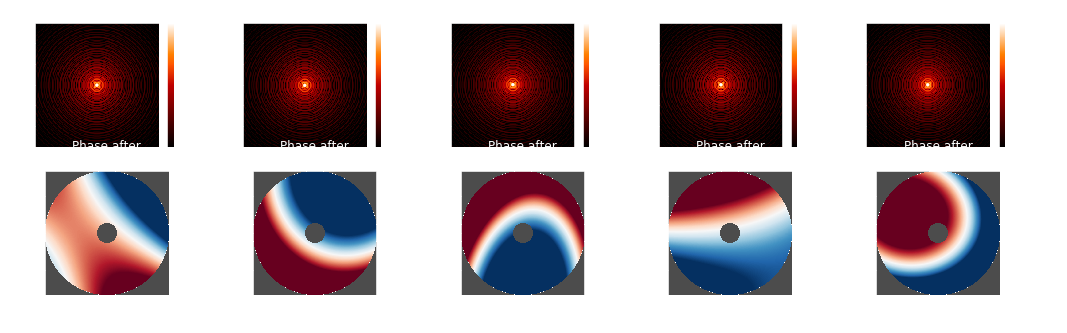

In [3]:
%run aperture_plane_model.py

In [4]:
fh = fits.open('./s_coelho14_sed/t03400_g+0.5_m13p04_sed.fits')

In [5]:
sp = lower_dimensional_structures.OneDSpectrum.from_hdu(fh)

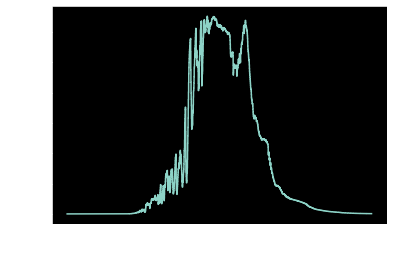

In [6]:
sp.quicklook()

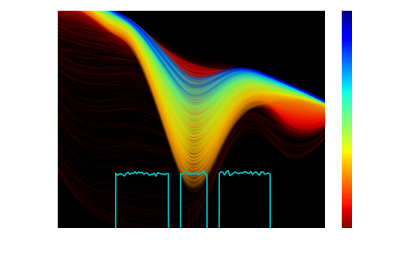

In [7]:
%run ../coelho_model_paa/coelho_specplot.py

In [8]:
def min_keys(jj, models_table, tbl):
    keys = []
    init_min = np.argmin(np.abs(models_table['teff'] - tbl['teff'][jj]))
    for ii in range(len(models_table)):
        if np.abs(models_table['teff'][ii] - tbl['teff'][jj]) == np.abs(models_table['teff'][init_min] - tbl['teff'][jj]):
            keys.append(ii)
    
    return keys

In [9]:
def closest_model(name, VVV=False):
    """"
    This assumes that we value logg being correct over teff.
    Unfortunately, trying to find the best fit from existing data requires us to use a strict poset.
    So one has to be prioritized over the other.
    """
    models_table = table.Table.read('coelho14_model_paa.fits')
    result = Table({'logg': [],
                    'teff': [],
    })
    data_stars = np.loadtxt('./TRILEGAL_data/' + name, unpack=True)
    logTe = []
    logg = []
    index = 13
    if VVV:
        index += 2

    for ii in range(len(data_stars[0])):
        if data_stars[index, ii] >= 16:
            logTe.append(data_stars[5, ii])
            logg.append(data_stars[6, ii])

    tbl = Table({'logTe': logTe,
                 'logg': logg,
                 })

    tbl.add_column(col=(10**tbl['logTe']), name='teff')

    for jj in range(len(tbl)):
        logg_keys = min_keys(jj=jj, models_table=models_table, tbl=tbl)
        
        small = np.argmin(np.abs(models_table['logg'][logg_keys] - tbl['logg'][jj]))
        corr = logg_keys[small]
        
        result.add_row([models_table['logg'][corr], models_table['teff'][corr]])

    return result

I'm going to run this with some fainter stars. Limiting mag will be 32, l=0.1, b=2.5, pix=50, area=0.00012531558641975312deg2.

In [10]:
data_m_1 = closest_model('data_m_1.dat')
data_v_1 = closest_model('data_v_1.dat', VVV=True)
data_m_1

logg,teff
float64,float64
1.0,3000.0
1.0,3000.0
1.0,3000.0
1.0,3000.0
1.0,3000.0
5.0,3200.0
5.0,3200.0
5.0,3600.0
4.5,6000.0


In [11]:
data_v_1

logg,teff
float64,float64
1.0,3000.0
5.0,3400.0
1.0,3000.0
1.0,3000.0
5.0,3200.0
5.0,3400.0
4.5,6000.0
1.0,3000.0
5.0,3400.0
